# Examples

These short examples demonstrate how you can use `spexread` and to read your files into `xarray.Datasets`.

These `Dataset` objects enable easy analysis and aggregation of data from an `SPE` file.

In [1]:
from spexread import read_spe_file
from spexread.data_models import SPEType
from pathlib import Path
import matplotlib.pyplot as plt

## Read a file as a dataset

`read_spe_file` reads a file as a `Dataset` unless you specify the keyword argument `as_dataset = False`, in which case a list of `DataArrays` will be returned.

The metadata from the file willbe stored in the `attrs` attribute, as a deeply nested dictionary.

A more convenient way to work with this metadata, is to read it into the `SPEType` pydantic model, which let's you traverse it by attribute access.

In a notebook, you can easily inspect the contents of a Dataset as shown below.

In [2]:
data = read_spe_file("../2025 April 15 11_02_25.spe")
meta_data = SPEType.model_validate(data.attrs)
data

<xarray.Dataset> Size: 3MB
Dimensions:     (frame: 5, y: 256, x: 1024)
Coordinates:
  * frame       (frame) int64 40B 0 1 2 3 4
  * y           (y) int64 2kB 0 1 2 3 4 5 6 7 ... 249 250 251 252 253 254 255
  * x           (x) int64 8kB 0 1 2 3 4 5 6 ... 1018 1019 1020 1021 1022 1023
    wavelength  (x) float64 8kB 331.8 331.9 332.0 332.1 ... 468.2 468.3 468.4
Data variables:
    ROI 0       (frame, y, x) uint16 3MB 8281 8281 8265 ... 12297 12249 12105
Attributes:
    version:       3.0
    FrameInfo:     {'type': 'Frame', 'count': 5, 'pixelFormat': 'uint16', 'si...
    MetaFormat:    {'MetaBlock': []}
    Calibrations:  {'WavelengthCalib': {'id': 1, 'date': datetime.datetime(19...
    GeneralInfo:   {'creator': 'TUE\\s106932', 'created': datetime.datetime(2...

## Plotting data

Datasets behave as if they are dictionary-like containers for Regions-of-Interest, meaning you can access them using a key: `ROI 0` by default for the first ROI.

Each element in the Dataset, is a DataArray, which is akin to a N-dimensional `DataFrame`.

In this case, you access the underlying data, not by a column name, but by the name of a `dimension` or `coordinate`.

Similarly, you can use `groupby` operations for aggregation etc.

This makes it very easy to iterate over the frames in a ROI and plot them, for instance:

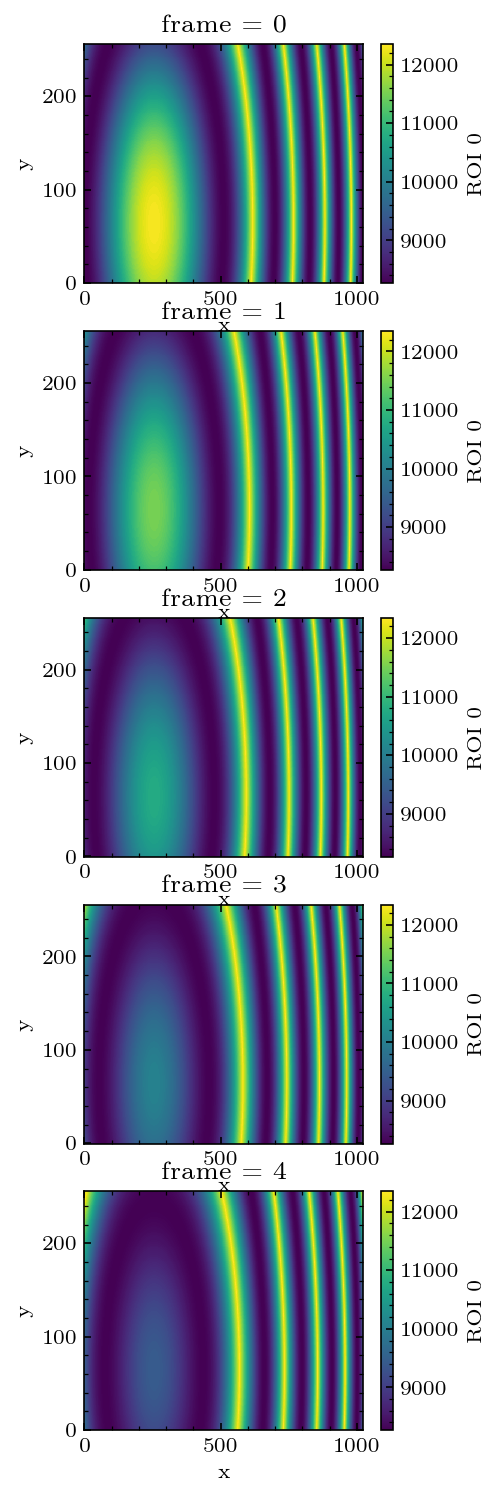

In [3]:
by_frames = data["ROI 0"].groupby("frame")
fig, ax = plt.subplots(len(by_frames), 1, figsize=(3, 12))
for index, frame in by_frames:
    frame.plot(x="x", y="y", ax=ax[index])

Instead of directly plotting, you can also aggregate over your data along a `dimension`, before visualizing.

Note: for aggregations etc. you should use only `dimensions`, not `coordinates`, as `coordinates` can depend on multiple `dimensions`.

Text(0, 0.5, 'Counts')

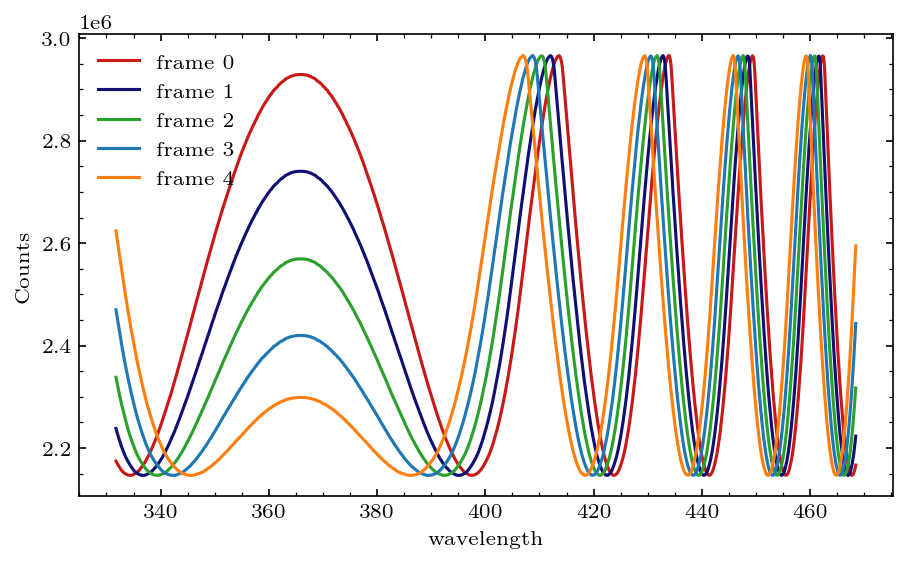

In [21]:
for index, frame in by_frames:
    frame.sum("y").plot(x="wavelength", label=f"frame {index}")
plt.title("")
plt.legend()
plt.ylabel("Counts")